In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.drop('id' , axis=1 , inplace = True)

dropped 'id' column from dataset 

In [18]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only bmi column have null values

In [26]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

There is only one Other gender so removing it will be benficial

In [34]:
df.drop(df[df['gender'] == 'Other'].index , inplace = True)

<Axes: xlabel='gender'>

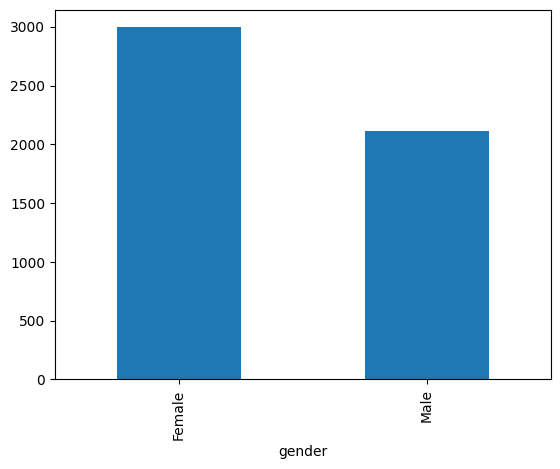

In [43]:
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='ever_married'>

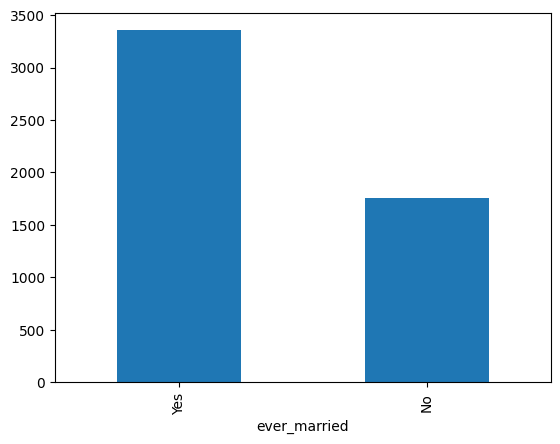

In [44]:
df['ever_married'].value_counts().plot(kind='bar')


<Axes: xlabel='work_type', ylabel='count'>

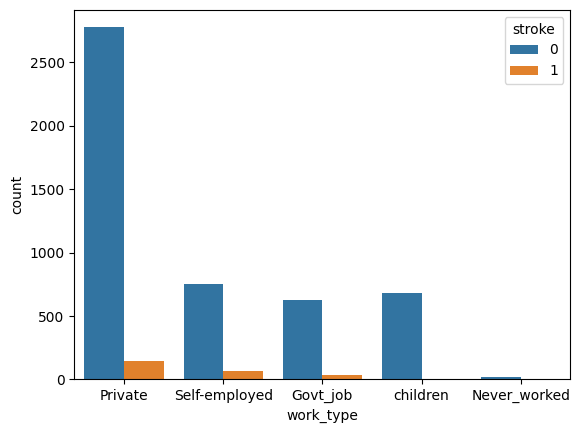

In [52]:
sns.countplot(data=df, x='work_type', hue='stroke')


<Axes: xlabel='Residence_type', ylabel='count'>

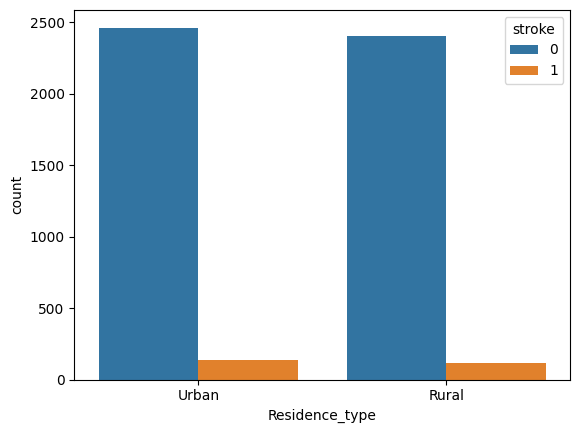

In [51]:
sns.countplot(data=df, x='Residence_type', hue='stroke')


<Axes: xlabel='smoking_status', ylabel='count'>

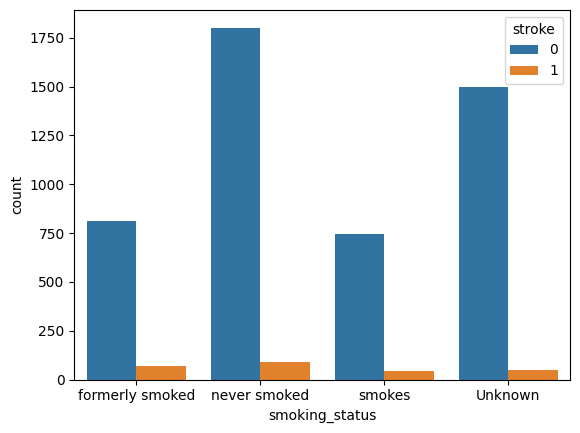

In [49]:
sns.countplot(data=df, x='smoking_status', hue='stroke')


<Axes: xlabel='stroke'>

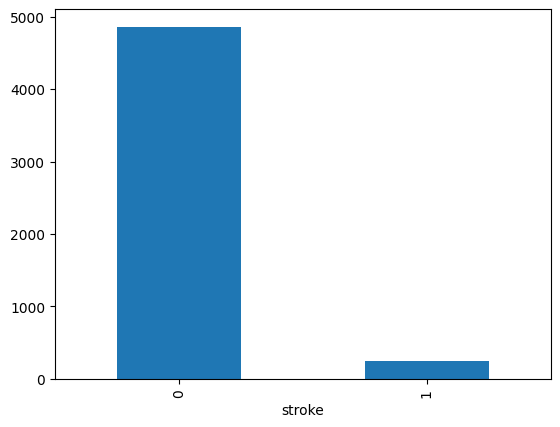

In [53]:
df['stroke'].value_counts().plot(kind='bar')

It is a highly imbalanced dataset 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [65]:
object_columns= df.select_dtypes(include='object').columns

In [63]:
from sklearn.preprocessing import LabelEncoder
import pickle

def encode_categorical_columns(df, categorical_columns):
    """
    Encode multiple categorical columns using LabelEncoder and save the encoders.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the categorical columns to be encoded.
    categorical_columns (list): A list of column names containing categorical data.
    
    Returns:
    pandas.DataFrame: DataFrame with categorical columns encoded.
    dict: Dictionary containing encoder objects for each categorical column.
    """
    encoders = {}  # Dictionary to store encoder objects
    
    for col in categorical_columns:
        encoder = LabelEncoder()
        df[col + '_encoded'] = encoder.fit_transform(df[col])  # Add encoded column to DataFrame
        encoders[col] = encoder  # Store encoder object in dictionary
    
    # Save encoders using pickle
    with open('encoders.pkl', 'wb') as f:
        pickle.dump(encoders, f)
    
    return df, encoders



In [67]:
df , encoders = encode_categorical_columns(df , object_columns)

In [69]:
df.select_dtypes(exclude='object')

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,ever_married_encoded,work_type_encoded,Residence_type_encoded,smoking_status_encoded
0,9046,67.0,0,1,228.69,36.6,1,1,1,2,1,1
1,51676,61.0,0,0,202.21,NaN,1,0,1,3,0,2
2,31112,80.0,0,1,105.92,32.5,1,1,1,2,0,2
3,60182,49.0,0,0,171.23,34.4,1,0,1,2,1,3
4,1665,79.0,1,0,174.12,24.0,1,0,1,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,0,1,2,1,2
5106,44873,81.0,0,0,125.20,40.0,0,0,1,3,1,2
5107,19723,35.0,0,0,82.99,30.6,0,0,1,3,0,2
5108,37544,51.0,0,0,166.29,25.6,0,1,1,2,0,1
